# RANDOM FOREST CLASSIFICATION

In [77]:
from warnings import filterwarnings
filterwarnings('ignore')

In [78]:
import pandas as pd 
df = pd.read_csv('drug200.csv')

In [79]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [80]:
df.info("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [81]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Seprate X and Y 

In [82]:
X = df.drop(columns=['Drug'])
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [83]:
Y = df[['Drug']]
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


# Seprate CAT and CON

In [84]:
cat = list(X.columns[X.dtypes=='object'])
cat

['Sex', 'BP', 'Cholesterol']

In [85]:
con = list(X.columns[X.dtypes!='object'])
con 

['Age', 'Na_to_K']

# Create a PREPROCESSING PIPELINE 

In [86]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [87]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [88]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [89]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

In [90]:
cat_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [91]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [92]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [93]:
X_pre = pre.fit_transform(X)
X_pre[0:5]

array([[-1.29159102,  1.28652212,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [-0.988614  , -1.14996267,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [ 1.0110343 ,  0.27179427,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ]])

In [94]:
cols = pre.get_feature_names_out()

In [95]:
X_pre = pd.DataFrame(X_pre,columns=cols)

In [96]:
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Aplly TRAIN nad TEST SPLIT

In [97]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y)

In [98]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
164,-1.715759,0.405574,0.0,1.0,1.0,0.0,0.0,0.0,1.0
188,1.253416,2.624597,0.0,1.0,1.0,0.0,0.0,0.0,1.0
25,-0.988614,0.378096,1.0,0.0,1.0,0.0,0.0,0.0,1.0
151,1.435202,-0.704354,0.0,1.0,1.0,0.0,0.0,1.0,0.0
115,0.405080,0.306766,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [99]:
ytrain.head()

,Drug
164,DrugY
188,DrugY
25,DrugY
151,drugB
115,DrugY


In [100]:
xtest.shape

(50, 9)

In [101]:
xtrain.shape

(150, 9)

# Create a RANDOM FOREST MODEL

In [102]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=2,max_depth=4,min_samples_leaf=4, min_samples_split=5,criterion='gini')
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=2)

In [103]:
model.score(xtest,ytest)

0.88

In [104]:
model.score(xtrain,ytrain)

0.9066666666666666

# Hyperparameter TUNING

In [105]:
params = {'n_estimators':[10,50,100,200],
          'max_depth':[2,3,4,5,6,7],
          'min_samples_leaf':[4,5,6,7,8],
        'min_samples_split':[5,6,7,8,9,10],
        'criterion':['gini','entrophy ']}

In [106]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params,cv= 5 , scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entrophy '],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [4, 5, 6, 7, 8],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [107]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_depth': 6,
 'criterion': 'gini'}

In [108]:
rscv.best_score_

0.9404316837846249

In [109]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=5)

# Evaluate the model TRAIN and TEST 

In [110]:
best_rfc.score(xtest,ytest)

1.0

In [111]:
best_rfc.score(xtrain,ytrain)

1.0

# Predict the TRAIN and TEST 

In [112]:
ypred_tr = best_rfc.predict(xtrain)
ypred_tr[0:5]

array(['DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY'], dtype=object)

In [113]:
ypred_ts = best_rfc.predict(xtest)
ypred_ts[0:5]

array(['drugX', 'DrugY', 'DrugY', 'drugX', 'drugA'], dtype=object)

CREATE CONFUSION MATRIX

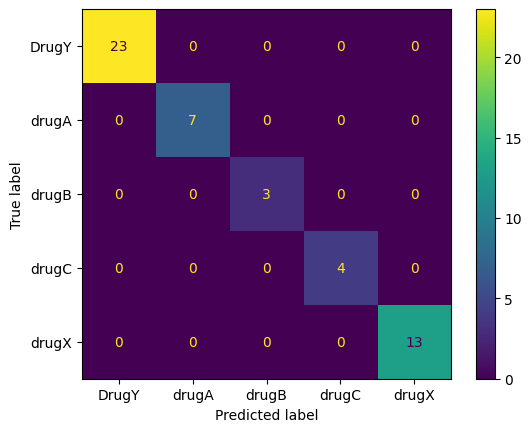

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_rfc.classes_)
cfd.plot()

# plot feature impotancese 

In [119]:
imp = best_rfc.feature_importances_
imp

array([0.06718536, 0.54560939, 0.00479342, 0.00395102, 0.16738132,
       0.04436821, 0.08879196, 0.02868983, 0.04922948])

In [120]:
imp = pd.Series(imp)
imp

0    0.067185
1    0.545609
2    0.004793
3    0.003951
4    0.167381
5    0.044368
6    0.088792
7    0.028690
8    0.049229
dtype: float64

In [121]:
imp.index = xtrain.columns
imp

num__Age                   0.067185
num__Na_to_K               0.545609
cat__Sex_F                 0.004793
cat__Sex_M                 0.003951
cat__BP_HIGH               0.167381
cat__BP_LOW                0.044368
cat__BP_NORMAL             0.088792
cat__Cholesterol_HIGH      0.028690
cat__Cholesterol_NORMAL    0.049229
dtype: float64

In [123]:
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.545609
cat__BP_HIGH               0.167381
cat__BP_NORMAL             0.088792
num__Age                   0.067185
cat__Cholesterol_NORMAL    0.049229
cat__BP_LOW                0.044368
cat__Cholesterol_HIGH      0.028690
cat__Sex_F                 0.004793
cat__Sex_M                 0.003951
dtype: float64

<Axes: >

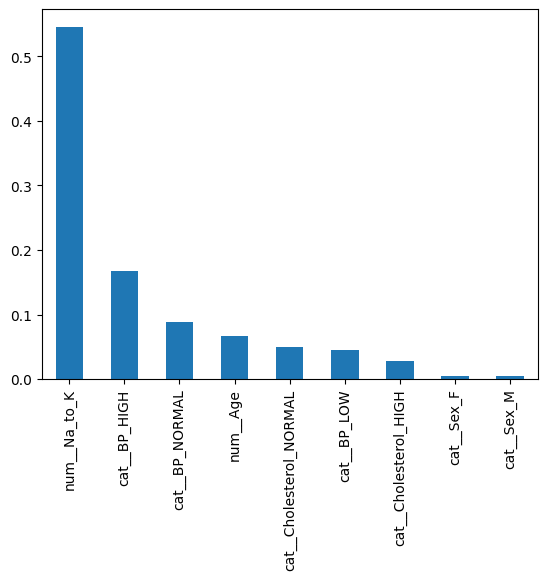

In [124]:
imp.plot(kind='bar')

# PREDICT OUT OF SAMPLE DATA

In [126]:
xnew = pd.read_csv('test_drugs.csv')
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,26,M,LOW,NORMAL,20.909
1,35,F,HIGH,HIGH,12.894
2,48,M,HIGH,NORMAL,10.446
3,40,F,NORMAL,HIGH,10.103
4,16,M,LOW,HIGH,12.006


# TRANSFROM ABOVE DATA 

In [128]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[-1.10980481,  0.6695254 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ],
       [-0.56444618, -0.44276176,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.22329406, -0.78248465,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.26146916, -0.83008471,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-1.71575884, -0.56599457,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ]])

In [130]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.109805,0.669525,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.564446,-0.442762,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.261469,-0.830085,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# predict the results with prob and pred


In [132]:
pred = best_rfc.predict(xnew_pre)
pred

array(['DrugY', 'drugA', 'drugA', 'drugX', 'drugC', 'drugA', 'DrugY',
       'drugC', 'DrugY', 'drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY'], dtype=object)

In [134]:
prob = best_rfc.predict_proba(xnew_pre)
prob[0:5]

array([[0.79855544, 0.        , 0.        , 0.02778685, 0.17365771],
       [0.13619107, 0.55779028, 0.21333329, 0.05735898, 0.03532638],
       [0.12824421, 0.55377535, 0.2671536 , 0.0035    , 0.04732683],
       [0.12333674, 0.02071429, 0.00629167, 0.11850226, 0.73115505],
       [0.11181361, 0.03912608, 0.01764182, 0.55789278, 0.27352572]])

 to check prob in rows use numpy 

In [135]:
import numpy as np 
prob_max = np.max(prob,axis=1)
prob_max


array([0.79855544, 0.55779028, 0.55377535, 0.73115505, 0.55789278,
       0.54640035, 0.85131304, 0.50404464, 0.78748095, 0.58903636,
       0.71813493, 0.80634874, 0.81401373, 0.91119748, 0.89795763,
       0.77950493, 0.89380642, 0.49368639, 0.82438278, 0.75167143,
       0.84192821, 0.83078059, 0.89380642, 0.54214682, 0.87580642,
       0.88271404, 0.49042275, 0.58903636, 0.58081845, 0.82192821])

# Save the above PRED AND PROB in xnew

In [136]:
xnew['Drug_Pred']=pred
xnew['Drug_Prob']=prob_max

In [137]:
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Pred,Drug_Prob
0,26,M,LOW,NORMAL,20.909,DrugY,0.798555
1,35,F,HIGH,HIGH,12.894,drugA,0.557790
2,48,M,HIGH,NORMAL,10.446,drugA,0.553775
3,40,F,NORMAL,HIGH,10.103,drugX,0.731155
4,16,M,LOW,HIGH,12.006,drugC,0.557893


# save the file to csv

In [138]:
xnew.to_csv('RESULTS.csv',index=False)